In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Problem statement

1) Problem statement

-This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [2]:
df=pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

    gender : sex of students -> (Male/female)
    race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
    parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
    lunch : having lunch before test (standard or free/reduced)
    test preparation course : complete or not complete before test
    math score
    reading score
    writing score

### Clean Data

In [5]:
#Check missing data
df.isnull().sum() 

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
#Check duplicate data
df.duplicated().sum()

0

In [7]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#check statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [9]:
#check unique values from the columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## exploring data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Category in gender: ", end= " ")
print(df["gender"].unique())

print("Category in Race & Etnicity: ", end= " ")
print(df["race_ethnicity"].unique())

print("Category in Parental education: ", end= " ")
print(df["parental_level_of_education"].unique())

print("Category in Lunch: ", end= " ")
print(df["lunch"].unique())

print("Category in test_preparation_course : ", end= " ")
print(df["test_preparation_course"].unique())

Category in gender:  ['female' 'male']
Category in Race & Etnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Category in Parental education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in Lunch:  ['standard' 'free/reduced']
Category in test_preparation_course :  ['none' 'completed']


In [12]:
numerical_features = [features for features in df.columns if df[features].dtype != "O"] 
categorical_features = [features for features in df.columns if df[features].dtype == "O"]

print("The {} numerical features listed are: {}".format(len(numerical_features) ,numerical_features))
print("The {} categorical features listed are: {}".format(len(categorical_features) ,categorical_features))

The 3 numerical features listed are: ['math_score', 'reading_score', 'writing_score']
The 5 categorical features listed are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [14]:
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
math_full = df[df['math_score'] == 100]['math_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()

print(f"People that got full marks for reading is: {reading_full}")
print(f"People that got full marks for math is: {math_full}")
print(f"People that got full marks for writing is: {writing_full}")

People that got full marks for reading is: 17
People that got full marks for math is: 7
People that got full marks for writing is: 14


In [15]:
reading_under_20 = df[df['reading_score'] <= 20]['reading_score'].count()
math_under_20 = df[df['math_score'] <= 20]['math_score'].count()
writing_under_20 = df[df['writing_score'] <= 20]['writing_score'].count()

print(f"People that got low marks for reading is: {reading_under_20}")
print(f"People that got low marks for math is: {math_under_20}")
print(f"People that got low marks for writing is: {writing_under_20}")

People that got low marks for reading is: 1
People that got low marks for math is: 4
People that got low marks for writing is: 3


## Data Visualitzation

__4.1 visualising average score distribution__
- Histogram
- KDE (Kernel Density Estimation)

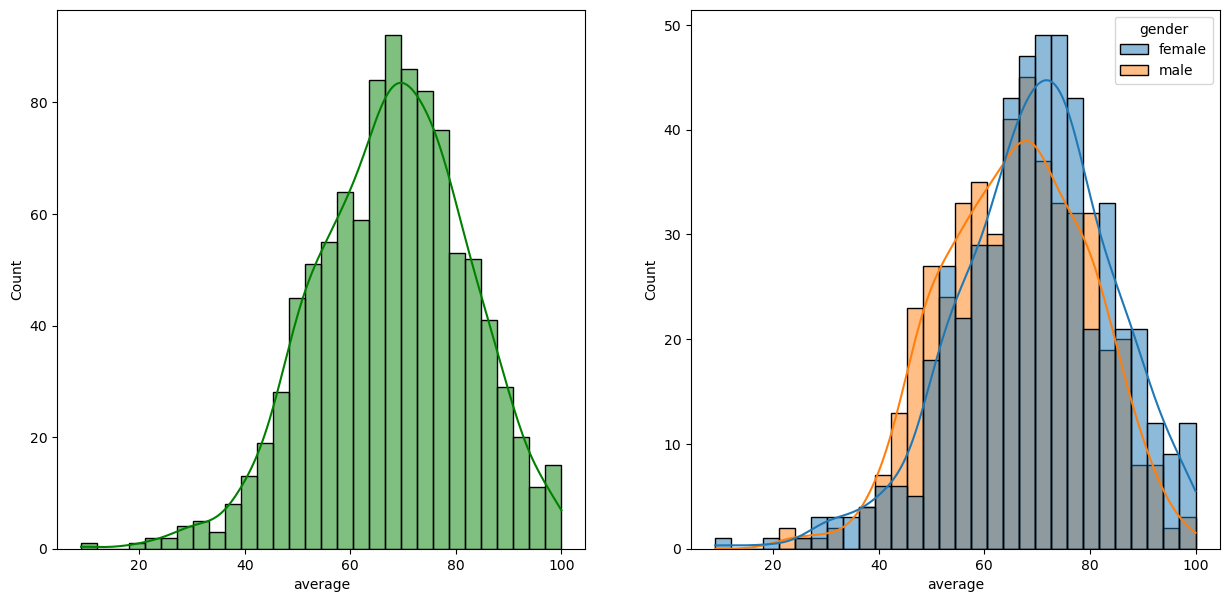

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')
plt.show()

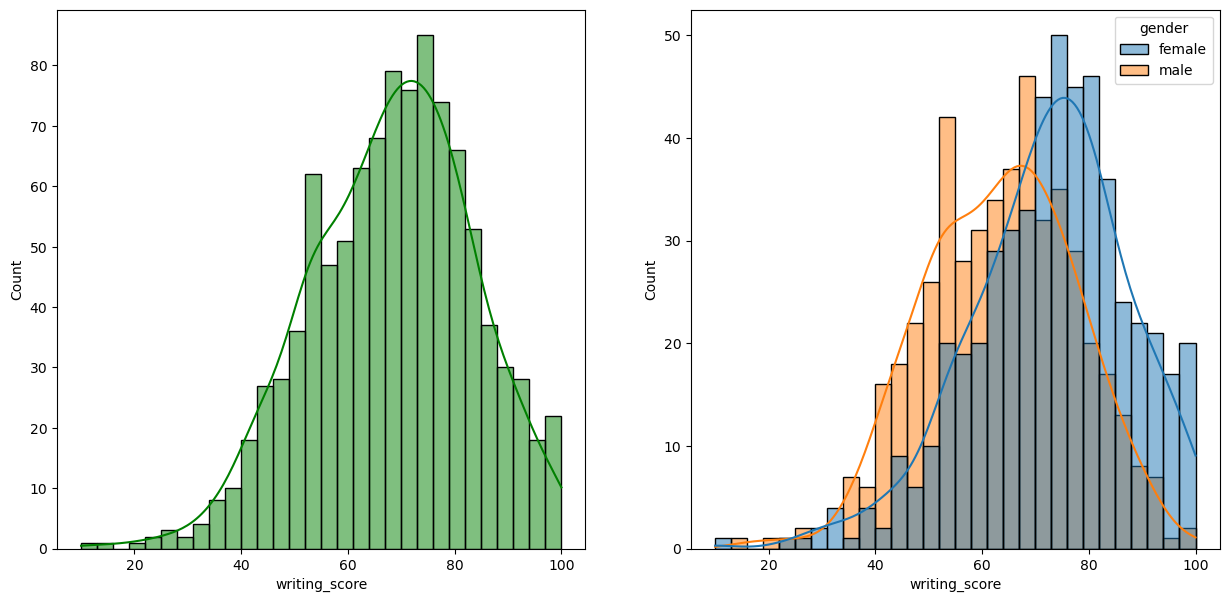

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='writing_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='writing_score', bins=30, kde=True, hue='gender')
plt.show()

<AxesSubplot: xlabel='average', ylabel='Count'>

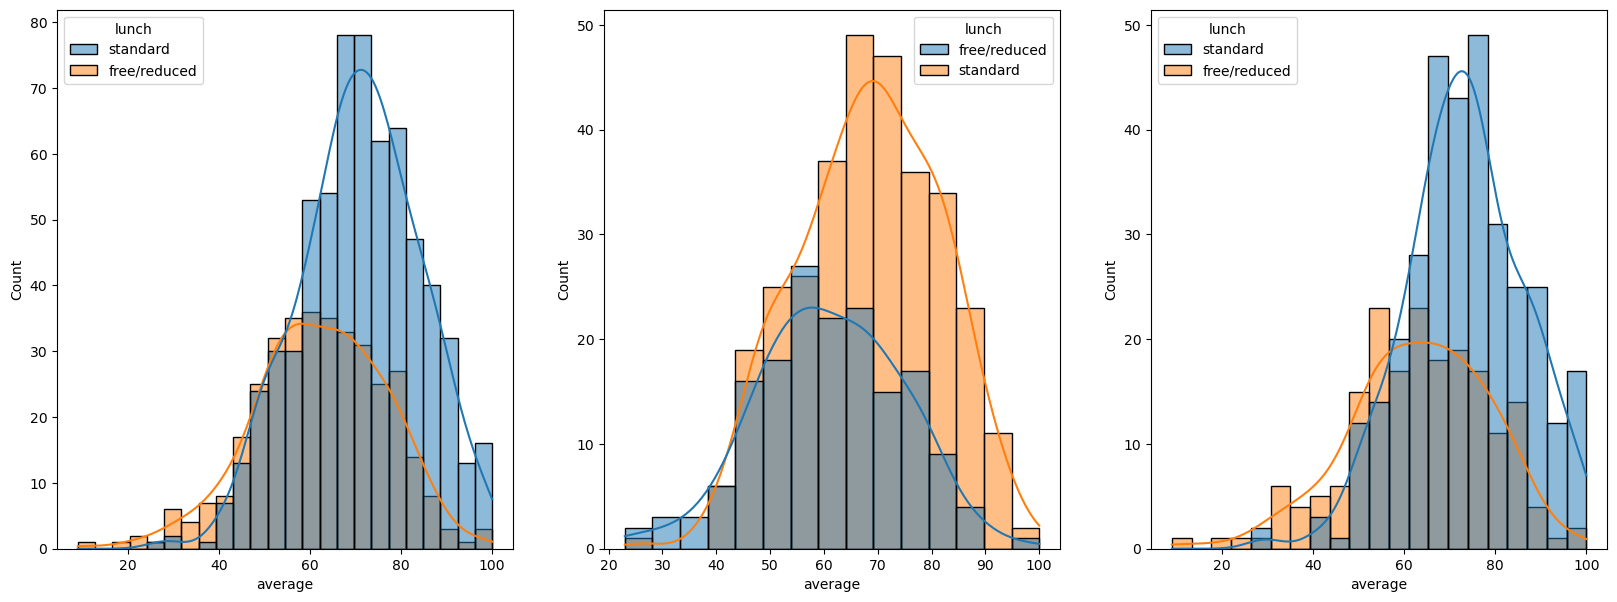

In [18]:
plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')

__insights__
- The average test score would go up when female and male students have a standard lunch

__4.2 maximum score of students in the class__

<AxesSubplot: title={'center': 'Reading Test Score'}, ylabel='reading_score'>

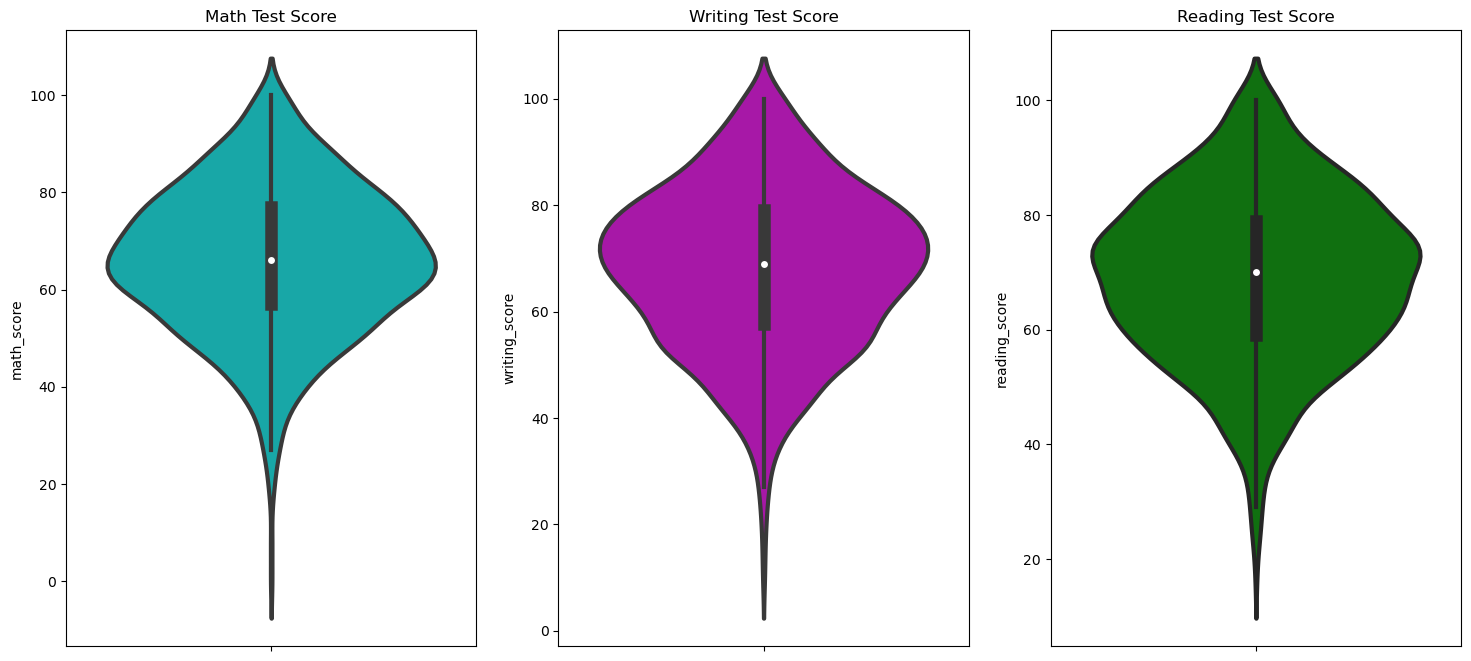

In [25]:
plt.subplots(1,3, figsize=(18,8))
plt.subplot(1,3,1)
plt.title("Math Test Score")
sns.violinplot(data=df, y='math_score', color='c', linewidth=3)

plt.subplot(1,3,2)
plt.title("Writing Test Score")
sns.violinplot(data=df, y='writing_score', color='m', linewidth=3)

plt.subplot(1,3,3)
plt.title("Reading Test Score")
sns.violinplot(data=df, y='reading_score', color='g', linewidth=3)

## __Feature Wise Visualization__

__4.4.1 Gender Column__
- Determine gender distribution
- Analyze relationship between gender and student performance

### Univariate Analysis

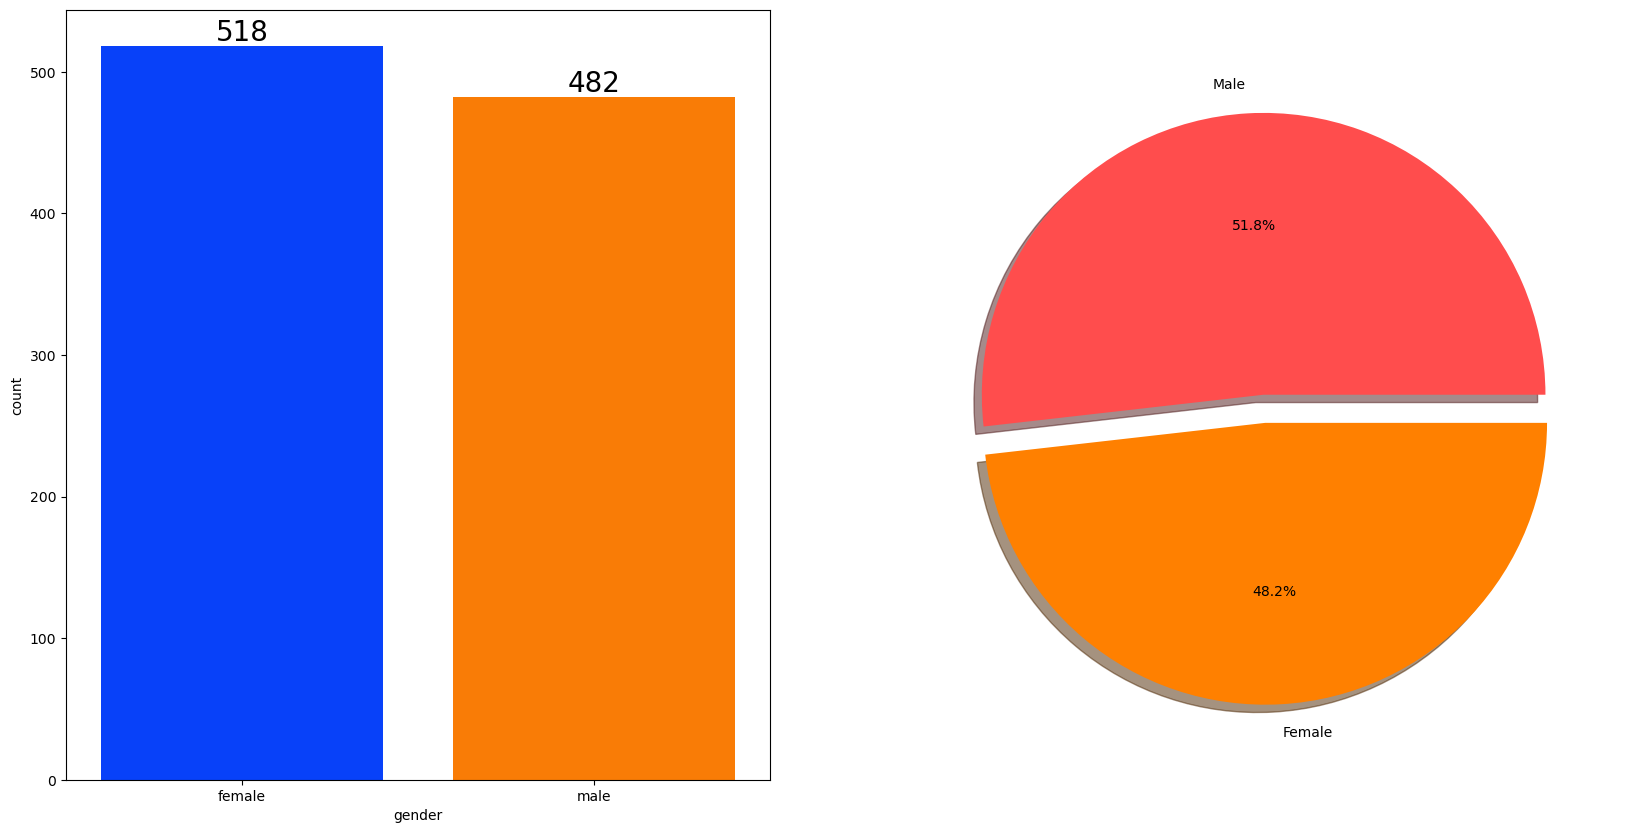

In [45]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['gender'].value_counts(), labels=['Male', "Female"],explode=[0,0.1],shadow=True,autopct='%1.1f%%', colors=['#ff4d4d','#ff8000'])
plt.show()

In [50]:
gender_group = df.groupby('gender').mean()
gender_group.T

gender,female,male
math_score,63.633205,68.728216
reading_score,72.608108,65.473029
writing_score,72.467181,63.311203
total_score,208.708494,197.512448
average,69.569498,65.837483


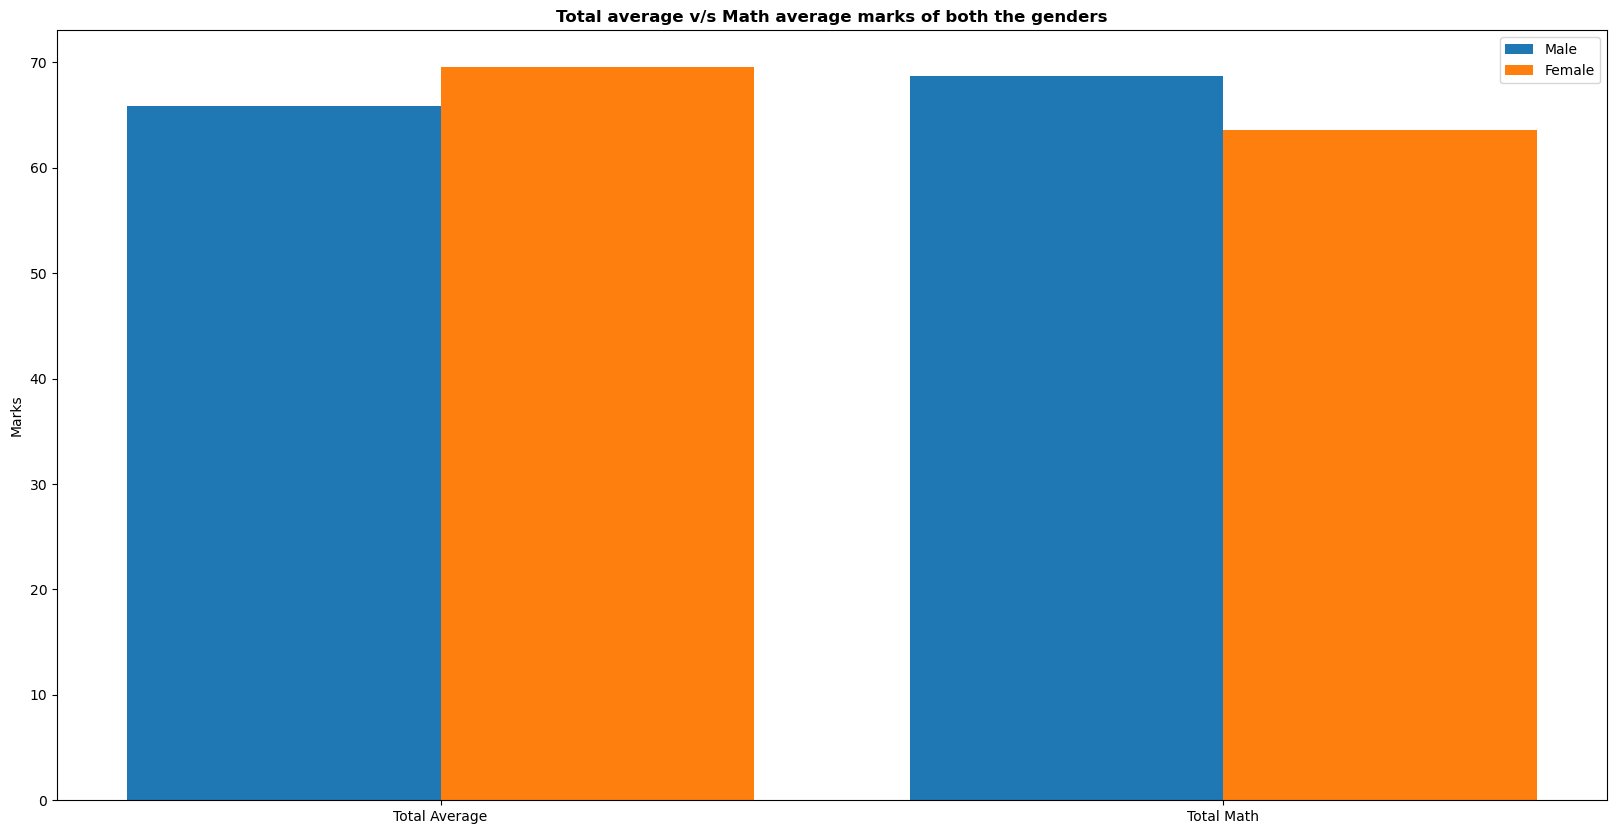

In [68]:
plt.figure(figsize=(20,10))

X=['Total Average', 'Total Math']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
plt.bar(X_axis-0.2, male_scores,width=0.4,label='Male')
plt.bar(X_axis+0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()